# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    city_name = city.city_name
    country_code = city.country_code
    
    # If the city is unique, then add it to a our cities list and append cities_df. 
    if city not in cities:
        cities.append(city_name)
        
# Print the city count to confirm sufficient count
print(len(cities))

1500


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# City Weather Dataframe Column Names
cities_weather_column_names = ["City", "Country","Date","Cloudiness",
                "Lat","Lng","Humidity",
                "Max Temp", "Wind Speed"]

In [4]:
# Test API Call
wealther_url = "http://api.openweathermap.org/data/2.5/weather?"
target_url = f"{wealther_url}appid={api_key}&units=imperial&q=Albany"
city_weather_info = requests.get(target_url).json()
city_weather_info

{'coord': {'lon': -73.75, 'lat': 42.65},
 'weather': [{'id': 600,
   'main': 'Snow',
   'description': 'light snow',
   'icon': '13n'}],
 'base': 'stations',
 'main': {'temp': 23.74,
  'pressure': 1025,
  'humidity': 45,
  'temp_min': 19.4,
  'temp_max': 26.96},
 'visibility': 16093,
 'wind': {'speed': 9.17, 'deg': 310, 'gust': 7.7},
 'clouds': {'all': 1},
 'dt': 1546822620,
 'sys': {'type': 1,
  'id': 5782,
  'message': 0.0055,
  'country': 'US',
  'sunrise': 1546863899,
  'sunset': 1546897066},
 'id': 5106834,
 'name': 'Albany',
 'cod': 200}

In [6]:
# Initialize City Weather Dataframe
cities_weather_df = pd.DataFrame(columns = cities_weather_column_names)

# Weather URL
wealther_url = "http://api.openweathermap.org/data/2.5/weather?"

# Loop through the list of cities and add the data to the df.
row_count = 1

print("Start Data Retrieval ----------")

for city in cities:
    target_city = city
    target_url = f"{wealther_url}appid={api_key}&units=imperial&q={target_city}"
    city_weather_info = requests.get(target_url).json()
    if city_weather_info["cod"] == "404":
        print("City not found. skipping...")
    else:
        cities_weather_df = cities_weather_df.append({"City":city_weather_info["name"],
                                  "Country":city_weather_info["sys"]["country"],
                                  "Date":city_weather_info["dt"],
                                  "Cloudiness":city_weather_info["clouds"]["all"],
                                  "Lat":city_weather_info["coord"]["lat"],
                                  "Lng":city_weather_info["coord"]["lon"],
                                  "Humidity":city_weather_info["main"]["humidity"],
                                  "Max Temp":city_weather_info["main"]["temp_max"],
                                  "Wind Speed":city_weather_info["wind"]["speed"]},ignore_index=True)
        print(f"Proceesing Record #{row_count} | {city_weather_info['name']} of {city_weather_info['sys']['country']}")
        row_count += 1

Start Data Retrieval ----------
City not found. skipping...
Proceesing Record #1 | Rikitea of PF
Proceesing Record #2 | Ushuaia of AR
Proceesing Record #3 | Lompoc of US
Proceesing Record #4 | Spearfish of US
Proceesing Record #5 | Barrow of AR
Proceesing Record #6 | Butaritari of KI
Proceesing Record #7 | Mariental of DE
Proceesing Record #8 | Lebu of ET
Proceesing Record #9 | Upernavik of GL
Proceesing Record #10 | Ballina of IE
Proceesing Record #11 | Saldanha of PT
Proceesing Record #12 | Ushuaia of AR
Proceesing Record #13 | Barrow of AR
Proceesing Record #14 | Arraial do Cabo of BR
Proceesing Record #15 | Along of IN
Proceesing Record #16 | Atuona of PF
Proceesing Record #17 | Barrow of AR
Proceesing Record #18 | Grand Gaube of MU
Proceesing Record #19 | Chokurdakh of RU
Proceesing Record #20 | Atuona of PF
Proceesing Record #21 | Punta Arenas of CL
Proceesing Record #22 | Jamestown of AU
Proceesing Record #23 | Busselton of AU
City not found. skipping...
Proceesing Record #24 | 

Proceesing Record #189 | Rikitea of PF
Proceesing Record #190 | Mataura of NZ
Proceesing Record #191 | Albany of US
Proceesing Record #192 | Barrow of AR
Proceesing Record #193 | Port Alfred of ZA
Proceesing Record #194 | Kodiak of US
Proceesing Record #195 | Barrow of AR
City not found. skipping...
Proceesing Record #196 | Severo-Kurilsk of RU
Proceesing Record #197 | Snyder of US
Proceesing Record #198 | Puerto Ayora of EC
Proceesing Record #199 | Muli of IN
Proceesing Record #200 | Yakovlevka of RU
Proceesing Record #201 | Belogorsk of UA
Proceesing Record #202 | Nikolskoye of RU
Proceesing Record #203 | Belen of TR
Proceesing Record #204 | Cherskiy of RU
Proceesing Record #205 | Souillac of FR
Proceesing Record #206 | Punta Arenas of CL
Proceesing Record #207 | Ushuaia of AR
Proceesing Record #208 | Busselton of AU
Proceesing Record #209 | Ponta Delgada of PT
Proceesing Record #210 | Ponta do Sol of BR
Proceesing Record #211 | Palmer of AU
Proceesing Record #212 | Hithadhoo of MV
P

Proceesing Record #382 | Bredasdorp of ZA
Proceesing Record #383 | Helong of CN
Proceesing Record #384 | Hirara of JP
Proceesing Record #385 | Tiksi of RU
Proceesing Record #386 | Cape Town of ZA
Proceesing Record #387 | Busselton of AU
Proceesing Record #388 | Bluff of AU
City not found. skipping...
Proceesing Record #389 | Rikitea of PF
Proceesing Record #390 | Port Alfred of ZA
Proceesing Record #391 | Puerto Ayora of EC
Proceesing Record #392 | Hobart of AU
Proceesing Record #393 | Barrow of AR
City not found. skipping...
Proceesing Record #394 | Saskylakh of RU
Proceesing Record #395 | Bell Ville of AR
Proceesing Record #396 | Ahipara of NZ
Proceesing Record #397 | Biak of ID
Proceesing Record #398 | Thompson of CA
Proceesing Record #399 | Hobart of AU
Proceesing Record #400 | Ponta do Sol of BR
Proceesing Record #401 | Baykit of RU
Proceesing Record #402 | Maldonado of UY
Proceesing Record #403 | Kodiak of US
Proceesing Record #404 | Madisonville of US
Proceesing Record #405 | To

Proceesing Record #574 | Port Lincoln of AU
Proceesing Record #575 | Torbay of CA
Proceesing Record #576 | San Cristobal of EC
Proceesing Record #577 | Atuona of PF
Proceesing Record #578 | Barrow of AR
Proceesing Record #579 | Lagoa of PT
Proceesing Record #580 | Porto Velho of BR
Proceesing Record #581 | Vila Franca do Campo of PT
Proceesing Record #582 | Huarmey of PE
Proceesing Record #583 | Esperance of TT
Proceesing Record #584 | Georgetown of GY
Proceesing Record #585 | New Norfolk of AU
Proceesing Record #586 | Puerto Ayora of EC
Proceesing Record #587 | Ushuaia of AR
Proceesing Record #588 | Hermanus of ZA
Proceesing Record #589 | Belmonte of PT
Proceesing Record #590 | Airai of TL
Proceesing Record #591 | Tartagal of AR
Proceesing Record #592 | Rikitea of PF
Proceesing Record #593 | Whitianga of NZ
Proceesing Record #594 | Leh of IN
Proceesing Record #595 | Hobart of AU
Proceesing Record #596 | Yaan of NG
Proceesing Record #597 | New Norfolk of AU
Proceesing Record #598 | Rik

Proceesing Record #769 | Comodoro Rivadavia of AR
Proceesing Record #770 | Anadyr of RU
Proceesing Record #771 | Punta Arenas of CL
Proceesing Record #772 | Atuona of PF
Proceesing Record #773 | Walvis Bay of NA
City not found. skipping...
City not found. skipping...
Proceesing Record #774 | Vila Franca do Campo of PT
Proceesing Record #775 | Airai of TL
Proceesing Record #776 | Kyren of RU
Proceesing Record #777 | Rikitea of PF
Proceesing Record #778 | Brae of GB
Proceesing Record #779 | Henties Bay of NA
Proceesing Record #780 | Mataura of NZ
Proceesing Record #781 | Maniitsoq of GL
Proceesing Record #782 | Puerto Escondido of MX
Proceesing Record #783 | Mataura of NZ
Proceesing Record #784 | Saint-Philippe of CA
Proceesing Record #785 | Souillac of FR
Proceesing Record #786 | Rikitea of PF
Proceesing Record #787 | Mackenzie of CA
Proceesing Record #788 | Kapaa of US
Proceesing Record #789 | Vaini of IN
City not found. skipping...
Proceesing Record #790 | Port Alfred of ZA
Proceesing

Proceesing Record #960 | Thompson of CA
Proceesing Record #961 | Mataura of NZ
Proceesing Record #962 | New Norfolk of AU
Proceesing Record #963 | Jamestown of AU
Proceesing Record #964 | Tiksi of RU
Proceesing Record #965 | Lahaina of US
City not found. skipping...
Proceesing Record #966 | Abonnema of NG
City not found. skipping...
Proceesing Record #967 | Avarua of CK
Proceesing Record #968 | Hauterive of FR
Proceesing Record #969 | Narsaq of GL
Proceesing Record #970 | Ushuaia of AR
Proceesing Record #971 | Katsuura of JP
Proceesing Record #972 | Hamilton of BM
Proceesing Record #973 | Semporna of MY
Proceesing Record #974 | College of US
Proceesing Record #975 | Rio Grande of BR
Proceesing Record #976 | Klaksvik of FO
Proceesing Record #977 | Albany of US
Proceesing Record #978 | Rikitea of PF
Proceesing Record #979 | San Cristobal of EC
City not found. skipping...
Proceesing Record #980 | Ushuaia of AR
Proceesing Record #981 | Punta Arenas of CL
Proceesing Record #982 | Rikitea of

City not found. skipping...
Proceesing Record #1143 | Nouakchott of MR
Proceesing Record #1144 | Ushuaia of AR
Proceesing Record #1145 | Cidreira of BR
City not found. skipping...
Proceesing Record #1146 | Albany of US
Proceesing Record #1147 | Kem of UG
City not found. skipping...
Proceesing Record #1148 | Rikitea of PF
Proceesing Record #1149 | Kapaa of US
Proceesing Record #1150 | Saskylakh of RU
City not found. skipping...
City not found. skipping...
Proceesing Record #1151 | Rikitea of PF
Proceesing Record #1152 | Ushuaia of AR
Proceesing Record #1153 | Havre-Saint-Pierre of CA
Proceesing Record #1154 | Ushuaia of AR
Proceesing Record #1155 | Norman Wells of CA
Proceesing Record #1156 | Bluff of AU
Proceesing Record #1157 | Shakiso of ET
Proceesing Record #1158 | Carnarvon of ZA
Proceesing Record #1159 | Khatanga of RU
Proceesing Record #1160 | Sioux Lookout of CA
Proceesing Record #1161 | Tasiilaq of GL
Proceesing Record #1162 | Ekibastuz of KZ
Proceesing Record #1163 | Albany of

Proceesing Record #1325 | Rikitea of PF
Proceesing Record #1326 | Iqaluit of CA
Proceesing Record #1327 | Vaini of IN
Proceesing Record #1328 | Alofi of NU
City not found. skipping...
Proceesing Record #1329 | Qaanaaq of GL
Proceesing Record #1330 | Punta Arenas of CL
Proceesing Record #1331 | Harper of US
Proceesing Record #1332 | Saskylakh of RU
Proceesing Record #1333 | Busselton of AU
Proceesing Record #1334 | Avarua of CK
Proceesing Record #1335 | New Norfolk of AU
City not found. skipping...
City not found. skipping...
Proceesing Record #1336 | Saint George of GR
Proceesing Record #1337 | East London of ZA
Proceesing Record #1338 | Kaitangata of NZ
Proceesing Record #1339 | Tiksi of RU
Proceesing Record #1340 | Takoradi of GH
Proceesing Record #1341 | Christchurch of NZ
Proceesing Record #1342 | Geraldton of CA
Proceesing Record #1343 | Mataura of NZ
City not found. skipping...
Proceesing Record #1344 | Cayenne of GF


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
cities_weather_df.count()

City          1344
Country       1344
Date          1344
Cloudiness    1344
Lat           1344
Lng           1344
Humidity      1344
Max Temp      1344
Wind Speed    1344
dtype: int64

In [8]:
cities_weather_df.head()

,City,Country,Date,Cloudiness,Lat,Lng,Humidity,Max Temp,Wind Speed
0,Rikitea,PF,1546823743,100,-23.12,-134.97,100,77.60,11.18
1,Ushuaia,AR,1546819200,75,-54.81,-68.31,80,39.20,23.04
2,Lompoc,US,1546822680,90,34.64,-120.46,79,57.92,14.99
3,Spearfish,US,1546823700,90,44.49,-103.86,56,42.80,9.17
4,Barrow,AR,1546823906,32,-38.31,-60.23,66,68.82,12.19


In [9]:
cities_weather_df.to_csv(output_data_file,index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot
* The graph shows the temperature peaks at when latitude is close to 0. This is in line with the fact that areas around equator have highest temperature.
* Another finding is there are more dots on the right side of the chart (when latitude is positive), this is in line with the fact that there are more cities on the north part of the equator. 

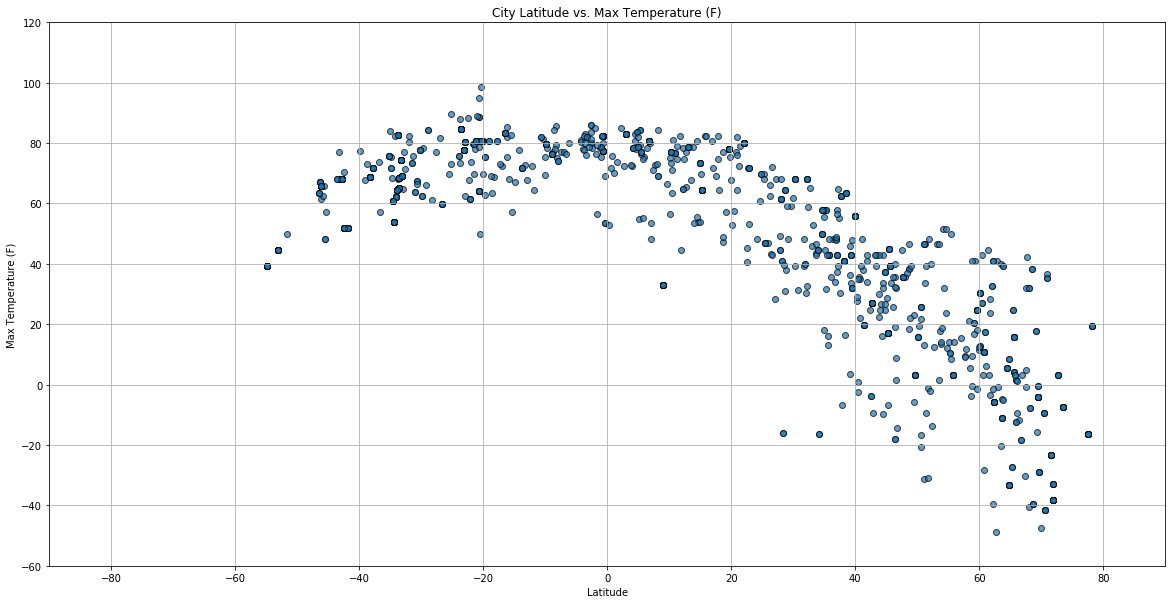

In [17]:
#Build a scatter plot for Latitude vs. Temperature
plt.figure(figsize=(20,10))
plt.scatter("Lat", "Max Temp",data=cities_weather_df, edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.7)

# Incorporate other properties
plt.title("City Latitude vs. Max Temperature (F)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90, 90])
plt.ylim([-60, 120])

# Save the figure
plt.savefig("output_figure/Latitude_Temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

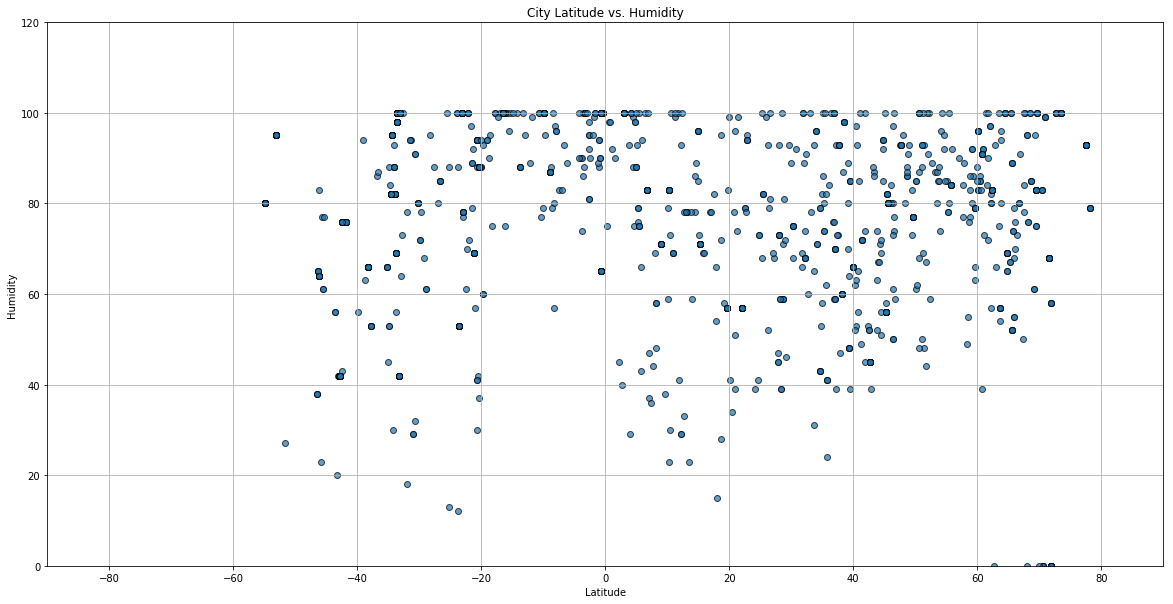

In [16]:
#Build a scatter plot for Latitude vs. Humidity
plt.figure(figsize=(20,10))
plt.scatter("Lat", "Humidity",data=cities_weather_df, edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.7)

# Incorporate other properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90, 90])
plt.ylim([0, 120])

# Save the figure
plt.savefig("output_figure/Latitude_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

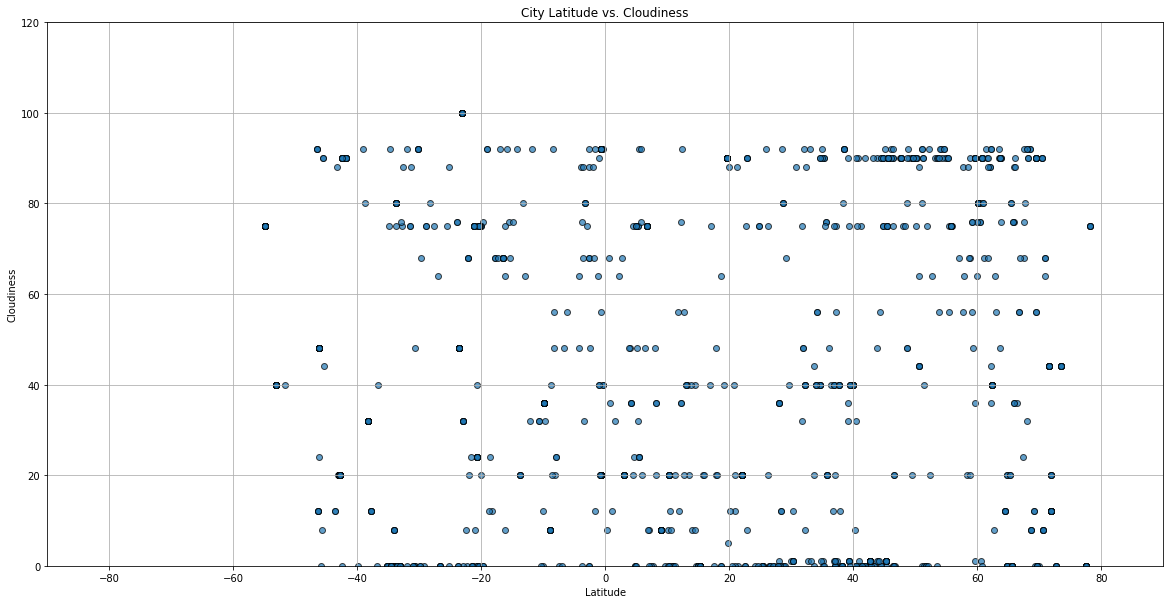

In [15]:
#Build a scatter plot for Latitude vs. Cloudiness
plt.figure(figsize=(20,10))
plt.scatter("Lat", "Cloudiness",data=cities_weather_df, edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90, 90])
plt.ylim([0, 120])

# Save the figure
plt.savefig("output_figure/Latitude_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

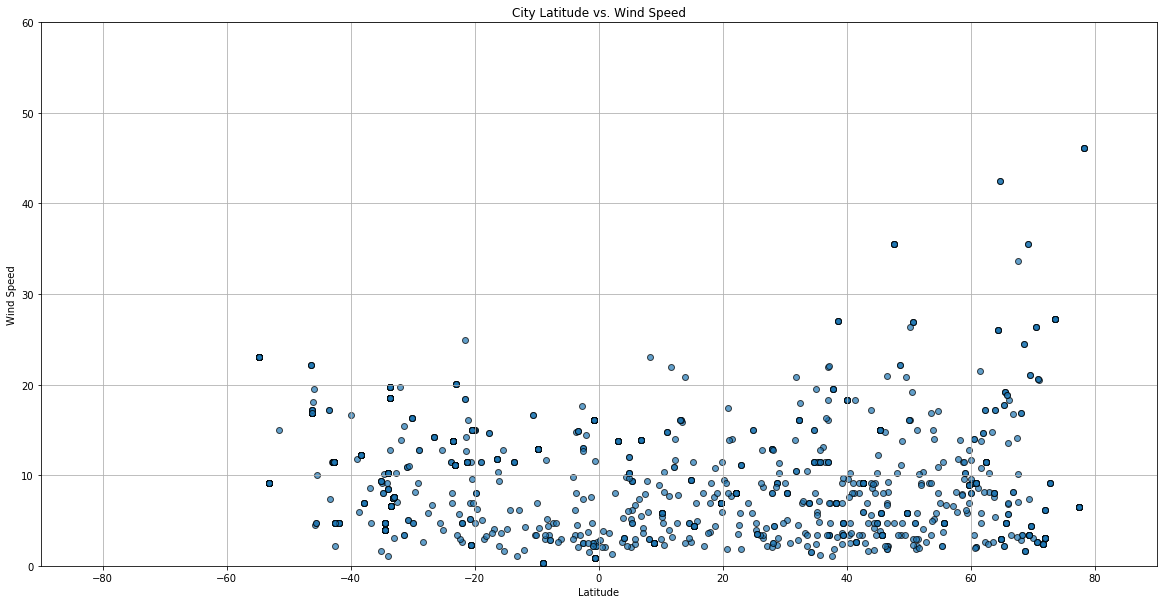

In [20]:
#Build a scatter plot for Latitude vs. Wind Speed
plt.figure(figsize=(20,10))
plt.scatter("Lat", "Wind Speed",data=cities_weather_df, edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90, 90])
plt.ylim([0, 60])

# Save the figure
plt.savefig("output_figure/Latitude_WindSpeed.png")

# Show plot
plt.show()